In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy import stats

In [2]:
#Data taken from 2020 census but as a csv
#Read the csv
state_pop_data = "../Resources/2020_population_by_state.csv"
state_pop_data_df = pd.read_csv(state_pop_data, encoding="ISO-8859-1")

In [3]:
#Read the CSV for all the state powerplants
state_generation_data = "../Output/All_States_by_source.csv"
state_generation_data_df = pd.read_csv(state_generation_data, encoding="ISO-8859-1", index_col=0)
#Select only useful columns
state_generation_data_df[["State", "Year", "Fuel Type", "Capacity (MWh)"]]

,State,Year,Fuel Type,Capacity (MWh)
0,AK,2021,Coal,168.9
1,AK,2021,Wind,59.0
2,AK,2021,Solar,0.8
3,AK,2021,Petroleum,742.7
4,AK,2021,Natural Gas,1273.1
...,...,...,...,...
8344,WY,1991,Petroleum,5.0
8345,WY,1990,Coal,5553.0
8346,WY,1990,Natural Gas,48.0
8347,WY,1990,Hydroelectric,270.0


In [4]:
#Read in CSV file for CO2 data by State (also taken from EIA)
state_CO2_data = "../Output/CO2emissions_by_state.csv"
state_CO2_data_df = pd.read_csv(state_CO2_data, encoding="ISO-8859-1")

In [5]:
#Sort the CO2 data to only include CO2 generated by electrical power generation
state_CO2_data_filtered_df = state_CO2_data_df.loc[state_CO2_data_df["Sector Name"] == "Electric Power carbon dioxide emissions"].reset_index(drop = True)
state_CO2_data_filtered_df = state_CO2_data_filtered_df[["State", "Year", "CO2 Emissions (Million Metric Tons)"]]
state_CO2_data_filtered_df

,State,Year,CO2 Emissions (Million Metric Tons)
0,AK,2020,2.735818
1,AK,2019,2.720353
2,AK,2018,2.694954
3,AK,2017,2.790627
4,AK,2016,2.759481
...,...,...,...
1576,WY,1994,42.349334
1577,WY,1993,40.326211
1578,WY,1992,42.395909
1579,WY,1991,38.695075


In [6]:
#Add a column to determine the percentage of electricity generated from high-carbon fossil fuels (Percentage High-Carbon)
state_CO2_data_2020_df = state_CO2_data_filtered_df.loc[state_CO2_data_filtered_df["Year"] == 2020].reset_index(drop=True)
state_CO2_data_2020_df["Percentage High-Carbon"] = ""

In [7]:
#Only select 2020 - the same year as census population data
state_generation_data_2020_df = state_generation_data_df.loc[state_generation_data_df["Year"] == 2020].reset_index(drop=True)

In [8]:
#Generate a list of the states
states = state_generation_data_2020_df["State"].unique()

In [9]:
#Create two empty lists - one to store the total generation capacity of each state
# and the other to share the generation capacity of non-renewable sources only for each state
total_capacity = []
nonrenewable_capacity = []

In [10]:
# Run through each state

for state in states:
    #Reset a counter which will add up the totals by state each time
    nonrenewables = 0
    total = 0
    #For each row in the electricity generation dataframe:
    for index, row in state_generation_data_2020_df.iterrows():
        #Select rows only that match the state we're looking at
        if state_generation_data_2020_df.loc[index, "State"] == state:
            #Select only the fossil fuel sources
            if ((state_generation_data_2020_df.loc[index, "Fuel Type"] == "Coal") | 
                (state_generation_data_2020_df.loc[index, "Fuel Type"] == "Natural Gas") |
                (state_generation_data_2020_df.loc[index, "Fuel Type"] == "Petroleum")):
                    #Add the totals of the non-renewables capacity together for each state 
                    nonrenewables = nonrenewables + state_generation_data_2020_df.loc[index, "Capacity (MWh)"]
            #And calculate the total capacity for each state
            total = total + state_generation_data_2020_df.loc[index, "Capacity (MWh)"]
            
    #Add both of these numbers to the empty list created earlier
    nonrenewable_capacity.append(nonrenewables)
    total_capacity.append(total)




In [11]:
nonrenewables_percent = []
for i in range (len(total_capacity)):
    #Calculate the percentage of electricity generated by non-renewable sources for each state
    percentnonrenewable = round(((nonrenewable_capacity[i])/(total_capacity[i]))*100,2)
    nonrenewables_percent.append(percentnonrenewable)
    
nonrenewables_percent

[80.44,
 67.86,
 77.35,
 63.87,
 51.95,
 64.22,
 76.54,
 68.9,
 98.8,
 87.57,
 75.99,
 78.48,
 46.08,
 21.95,
 59.11,
 87.6,
 52.39,
 93.37,
 90.16,
 87.57,
 79.03,
 57.82,
 72.9,
 59.07,
 81.98,
 88.68,
 36.49,
 63.97,
 50.48,
 62.84,
 53.59,
 73.53,
 62.78,
 64.71,
 70.1,
 88.01,
 63.94,
 22.86,
 75.17,
 87.84,
 56.64,
 30.6,
 62.51,
 68.19,
 79.2,
 76.18,
 17.75,
 13.59,
 84.31,
 92.71,
 69.7]

In [12]:
#Input that data to the state CO2 dataframe
state_CO2_data_2020_df["Percentage High-Carbon"] = nonrenewables_percent
state_CO2_data_2020_df

,State,Year,CO2 Emissions (Million Metric Tons),Percentage High-Carbon
0,AK,2020,2.735818,80.44
1,AL,2020,42.690489,67.86
2,AR,2020,22.566543,77.35
3,AZ,2020,35.584387,63.87
4,CA,2020,33.648911,51.95
5,CO,2020,28.577018,64.22
6,CT,2020,8.654876,76.54
7,DC,2020,0.000000,68.90
8,DE,2020,1.803566,98.80
9,FL,2020,92.282309,87.57


In [13]:
#Add in a column to determine the CO2 emissions per person
state_CO2_data_2020_df.insert(3, "CO2 Emissions per capita (Tons per person)", "")

In [14]:
# Calculate the CO2 Emissions per capita (in tons per person)
state_CO2_data_2020_df["CO2 Emissions per capita (Tons per person)"] = (state_CO2_data_2020_df["CO2 Emissions (Million Metric Tons)"]/state_pop_data_df["Population"])*(1000000)
state_CO2_data_2020_df

,State,Year,CO2 Emissions (Million Metric Tons),CO2 Emissions per capita (Tons per person),Percentage High-Carbon
0,AK,2020,2.735818,3.730368,80.44
1,AL,2020,42.690489,8.496839,67.86
2,AR,2020,22.566543,7.493396,77.35
3,AZ,2020,35.584387,4.975792,63.87
4,CA,2020,33.648911,0.851047,51.95
5,CO,2020,28.577018,4.949504,64.22
6,CT,2020,8.654876,2.400169,76.54
7,DC,2020,0.000000,0.000000,68.90
8,DE,2020,1.803566,1.821880,98.80
9,FL,2020,92.282309,4.284590,87.57


The r-value for this is 0.14184320180552065


<function matplotlib.pyplot.show(*args, **kw)>

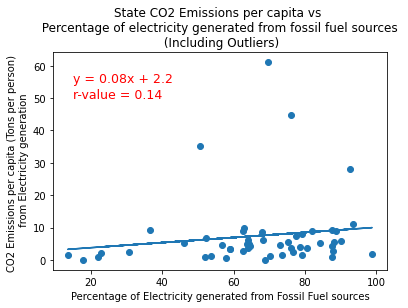

In [15]:
#Plot the percentage of electricity generated by fossil fuels for each state
#Against the CO2 emissions per capita in that state

x_values = state_CO2_data_2020_df["Percentage High-Carbon"]
y_values = state_CO2_data_2020_df["CO2 Emissions per capita (Tons per person)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
rvalue_string = f"r-value = {str(round(rvalue,2))}"

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values)
plt.annotate(line_eq,(15,55),fontsize=12.5,color="red")
plt.annotate(rvalue_string, (15, 50), fontsize = 12.5, color = "red")
plt.xlabel("Percentage of Electricity generated from Fossil Fuel sources")
plt.ylabel("CO2 Emissions per capita (Tons per person) \n from Electricity generation")
plt.title("State CO2 Emissions per capita vs \n Percentage of electricity generated from fossil fuel sources \n (Including Outliers)")
print(f"The r-value for this is {rvalue}")

plt.savefig("../Output/Images/State_CO2_Emissions_against_%fossilfuels(Inc_Outliers).png", bbox_inches = "tight")
plt.show


In [16]:
#Determing outliers
quartiles = state_CO2_data_2020_df["CO2 Emissions per capita (Tons per person)"].quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers_df = state_CO2_data_2020_df.loc[(state_CO2_data_2020_df["CO2 Emissions per capita (Tons per person)"] < lower_bound) | (state_CO2_data_2020_df["CO2 Emissions per capita (Tons per person)"] > upper_bound)]
print(outliers_df["State"])
print(f"The upper bound is {upper_bound}")

28    ND
45    VA
49    WV
50    WY
Name: State, dtype: object
The upper bound is 16.095612260385625


In [17]:
#Removing the Outliers
state_CO2_data_2020_without_outliers = state_CO2_data_2020_df.loc[(state_CO2_data_2020_df["CO2 Emissions per capita (Tons per person)"] < upper_bound) & (state_CO2_data_2020_df["CO2 Emissions per capita (Tons per person)"] > 0)]
state_CO2_data_2020_without_outliers

,State,Year,CO2 Emissions (Million Metric Tons),CO2 Emissions per capita (Tons per person),Percentage High-Carbon
0,AK,2020,2.735818,3.730368,80.44
1,AL,2020,42.690489,8.496839,67.86
2,AR,2020,22.566543,7.493396,77.35
3,AZ,2020,35.584387,4.975792,63.87
4,CA,2020,33.648911,0.851047,51.95
5,CO,2020,28.577018,4.949504,64.22
6,CT,2020,8.654876,2.400169,76.54
8,DE,2020,1.803566,1.821880,98.80
9,FL,2020,92.282309,4.284590,87.57
10,GA,2020,37.314860,3.574430,75.99


The r-value for this is 0.34206996898757364


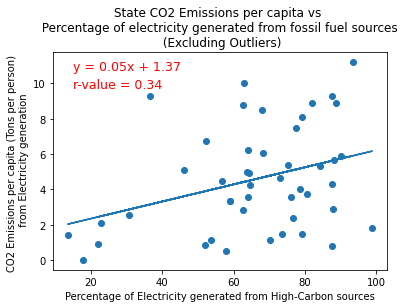

In [18]:
x_values_no_outs = state_CO2_data_2020_without_outliers["Percentage High-Carbon"]
y_values_no_outs = state_CO2_data_2020_without_outliers["CO2 Emissions per capita (Tons per person)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_no_outs, y_values_no_outs)
regress_values_no_outs = x_values_no_outs * slope + intercept

line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
rvalue_string = f"r-value = {str(round(rvalue,2))}"

plt.scatter(x_values_no_outs, y_values_no_outs)
plt.plot(x_values_no_outs,regress_values_no_outs)
plt.xlabel("Percentage of Electricity generated from High-Carbon sources")
plt.ylabel("CO2 Emissions per capita (Tons per person) \n from Electricity generation")

plt.title("State CO2 Emissions per capita vs \n Percentage of electricity generated from fossil fuel sources \n (Excluding Outliers)")

plt.annotate(line_eq,(15,10.75),fontsize=12.5,color="red")
plt.annotate(rvalue_string, (15, 9.75), fontsize = 12.5, color = "red")

plt.savefig("../Output/Images/State_CO2_Emissions_against_%fossilfuels(Exc_Outliers).png", bbox_inches = "tight")

plt.show
print(f"The r-value for this is {rvalue}")